In [14]:
import numpy as np
from matplotlib import pyplot as plt

m = 100
n = 120
a = np.arange(0,m)+1
b = np.arange(0,n)+0.5
A = np.sin(10 * np.outer(a,b)**3)
xi = np.sin(31 * np.arange(1,n+1)**3)
b = A @ xi
lambda1 = 2
lambda2 = 0.5

Proximal subgradient

In [15]:
k = 1
x = np.zeros(n)
obj = np.zeros(100)

objfun = lambda x: np.linalg.norm(A @ x - b,1) + 1/2*np.linalg.norm(x)**2

while k<100+1:
    x = (x-1/np.sqrt(k)*A.T@np.sign(A@x-b) )/(1/np.sqrt(k) + 1)
    obj[k-1] = objfun(x)
    k +=1

# plt.figure()
# plt.plot(xi, 'b')
# plt.plot(x, 'r')
# plt.show()

FDPG

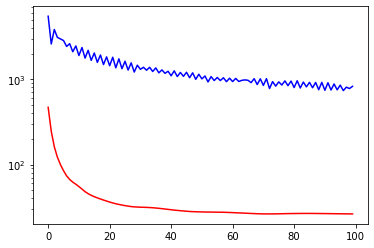

In [16]:
k=1
t=1
L = np.linalg.norm(A, 2)**2
obj2 = np.zeros(100)

soft_thresh = lambda x, t: np.sign(x) * np.maximum(np.abs(x) - t, 0)

u = np.zeros(n)
x = np.zeros(n)
ynew = np.zeros(m)
w = np.zeros(m)

while k<100+1:
    y = np.copy(ynew)

    u = A.T@w
    Au = A@u
    ynew = w-1/L*Au + 1/L* soft_thresh(Au -L*w - b , L) + b/L
    tnew = (1+np.sqrt(1+4*t**2))/2
    w = ynew + (t-1)/tnew*(ynew-y)

    t = tnew
    y = np.copy(ynew)

    obj2[k-1] = objfun(u)

    k+=1

plt.figure()
plt.semilogy(obj, 'b', label='Proximal subgradient')
plt.semilogy(obj2, 'r', label='FDPG')
plt.show()